# Python: Cleaning and Deeper Insights

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Load and merge all three datasets, handle missing values.

In [2]:
#1. Loading TreantmentRecords
Treatment = pd.read_csv(r"C:\Users\soura\Downloads\TreatmentRecords_Cleaned.csv", parse_dates = ["Treatment_Date"])
Treatment.head()

,Record_ID,Patient_ID,Doctor_ID,Treatment_Date,Outcome,Treatment_Duration_Days,Treatment_Cost,Satisfaction_Score
0,T100000,P4720,D1259,2023-11-24,Recovered,23,5052.93,4.6
1,T100001,P1784,D1047,2023-02-27,Recovered,20,4784.94,5.8
2,T100002,P4220,D1253,2023-01-13,Ongoing,6,1969.22,4.8
3,T100003,P4259,D1073,2023-05-21,Recovered,12,5682.53,5.9
4,T100004,P4724,D1165,2023-05-06,Critical,18,6652.05,4.7


In [3]:
#1. Loading DoctorDetails
Doctors = pd.read_csv(r"C:\Users\soura\Downloads\DoctorDetails_Cleaned.csv")
Doctors.head()

,Doctor_ID,Name,Specialty,Years_Of_Experience,Hospital_Affiliation
0,D1000,Dr_0,Neurologist,4,Hospital_0
1,D1001,Dr_1,General Physician,23,Hospital_1
2,D1002,Dr_2,Endocrinologist,7,Hospital_2
3,D1003,Dr_3,Neurologist,6,Hospital_3
4,D1004,Dr_4,Endocrinologist,14,Hospital_4


In [4]:
#Loading PatientInfo
Patients = pd.read_csv(r"C:\Users\soura\Downloads\PatientInfo_Cleaned.csv")
Patients.head()

,Patient_ID,Name,Gender,Age,Region,Disease
0,P1000,Patient_0,Other,61,South,Asthma
1,P1001,Patient_1,Male,38,South,COVID-19
2,P1002,Patient_2,Other,45,West,Cardiac Issue
3,P1003,Patient_3,Other,71,West,Diabetes
4,P1004,Patient_4,Male,71,North,Cardiac Issue


In [5]:
#Merging
df = (Treatment
      .merge(Doctors, on= "Doctor_ID", how= "left")
      .merge(Patients, on= "Patient_ID", how= "left")
     )
df

,Record_ID,Patient_ID,Doctor_ID,Treatment_Date,Outcome,Treatment_Duration_Days,Treatment_Cost,Satisfaction_Score,Name_x,Specialty,Years_Of_Experience,Hospital_Affiliation,Name_y,Gender,Age,Region,Disease
0,T100000,P4720,D1259,2023-11-24,Recovered,23,5052.93,4.6,Dr_259,Endocrinologist,7,Hospital_19,Patient_3720,Other,63,South,Diabetes
1,T100001,P1784,D1047,2023-02-27,Recovered,20,4784.94,5.8,Dr_47,Cardiologist,23,Hospital_7,Patient_784,Other,44,West,Cardiac Issue
2,T100002,P4220,D1253,2023-01-13,Ongoing,6,1969.22,4.8,Dr_253,Endocrinologist,23,Hospital_13,Patient_3220,Female,45,West,Asthma
3,T100003,P4259,D1073,2023-05-21,Recovered,12,5682.53,5.9,Dr_73,Neurologist,15,Hospital_13,Patient_3259,Other,56,North,Asthma
4,T100004,P4724,D1165,2023-05-06,Critical,18,6652.05,4.7,Dr_165,Endocrinologist,4,Hospital_5,Patient_3724,Other,28,South,Diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,T109995,P1333,D1188,2023-12-25,Recovered,2,6356.41,4.2,Dr_188,General Physician,16,Hospital_8,Patient_333,Other,52,South,Asthma
9996,T109996,P3562,D1082,2023-07-26,Recovered,12,5538.77,4.6,Dr_82,Endocrinologist,27,Hospital_2,Patient_2562,Male,46,North,COVID-19
9997,T109997,P3488,D1282,2023-08-17,Recovered,2,3775.52,5.1,Dr_282,Neurologist,29,Hospital_2,Patient_2488,Male,42,East,Diabetes
9998,T109998,P3720,D1123,2023-11-26,Recovered,17,4689.74,5.8,Dr_123,Cardiologist,11,Hospital_3,Patient_2720,Other,42,North,COVID-19


### 2. Identify duplicate patient IDs and remove them.

In [6]:
#Checking the null counts
df.isnull().sum()

Record_ID                  0
Patient_ID                 0
Doctor_ID                  0
Treatment_Date             0
Outcome                    0
Treatment_Duration_Days    0
Treatment_Cost             0
Satisfaction_Score         0
Name_x                     0
Specialty                  0
Years_Of_Experience        0
Hospital_Affiliation       0
Name_y                     0
Gender                     0
Age                        0
Region                     0
Disease                    0
dtype: int64

In [28]:
#Confirming whether there is no nulls
Treatment[~Treatment["Doctor_ID"].isin(Doctors["Doctor_ID"])]

,Record_ID,Patient_ID,Doctor_ID,Treatment_Date,Outcome,Treatment_Duration_Days,Treatment_Cost,Satisfaction_Score


In [8]:
Treatment[~Treatment["Patient_ID"].isin(Patients["Patient_ID"])]

,Record_ID,Patient_ID,Doctor_ID,Treatment_Date,Outcome,Treatment_Duration_Days,Treatment_Cost,Satisfaction_Score


In [9]:
#Finding Duplicate row counts
df.duplicated().sum()

np.int64(0)

In [10]:
#confirming whether no duplicates exist
duplicates_rows = df[df.duplicated(keep=False)]
duplicates_rows

,Record_ID,Patient_ID,Doctor_ID,Treatment_Date,Outcome,Treatment_Duration_Days,Treatment_Cost,Satisfaction_Score,Name_x,Specialty,Years_Of_Experience,Hospital_Affiliation,Name_y,Gender,Age,Region,Disease


### 3. Create a bar chart showing patient count by department.

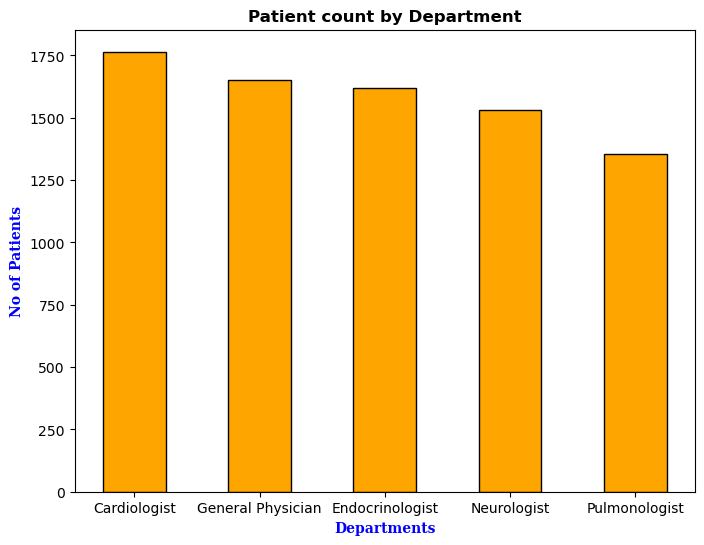

In [30]:
Patient_count_Dept = df.groupby("Specialty")["Patient_ID"].nunique().sort_values(ascending= False)
plt.figure(figsize=(8,6))
plt.bar(x= Patient_count_Dept.index, height= Patient_count_Dept.values, color= "orange", edgecolor= 'black', width= 0.5)

font1 = {"family": "serif", "color": "Blue", "fontsize":10}
plt.ylabel("No of Patients", fontdict= font1, weight= "bold")
plt.xlabel("Departments", fontdict= font1, weight= "bold")
plt.title("Patient count by Department", loc= "center", weight= "bold")
plt.show()

### 4. Visualize average treatment duration by condition.

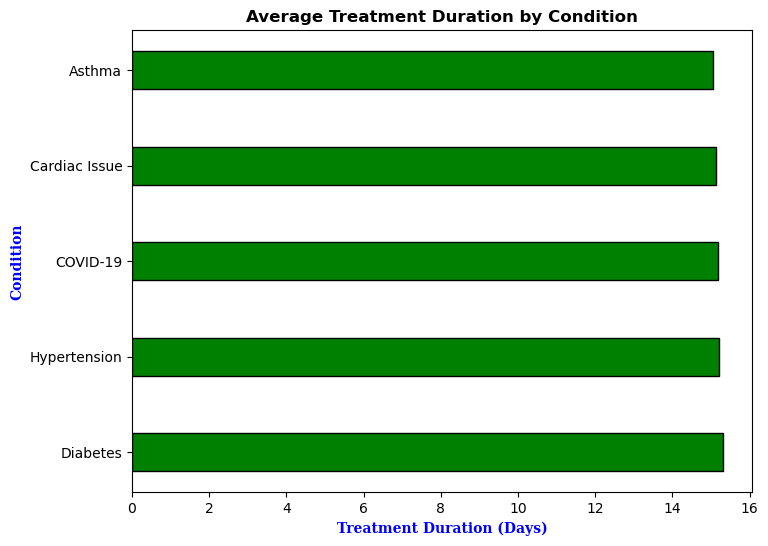

In [32]:
Avg_duration_condition = df.groupby("Disease")["Treatment_Duration_Days"].mean().sort_values(ascending= False)
plt.figure(figsize=(8,6))
plt.barh(Avg_duration_condition.index, Avg_duration_condition.values, color= "green", edgecolor= 'black', height= 0.4)
plt.ylabel("Condition", fontdict= font1, weight= "bold")
plt.xlabel("Treatment Duration (Days)", fontdict= font1, weight= "bold")
plt.title("Average Treatment Duration by Condition", loc= "center", weight= "bold")
plt.show()

In [13]:
#checking whether avg is same for all
Avg_duration_condition 

Disease
Diabetes         15.297356
Hypertension     15.209416
COVID-19         15.186747
Cardiac Issue    15.128476
Asthma           15.055794
Name: Treatment_Duration_Days, dtype: float64

### 5. Identify which age group has the highest readmission rate.

In [14]:
#Creating age groups
df['Age_Group'] = pd.cut(
    df['Age'], bins= [0,17,59,120], labels= ['Child', 'Adult', 'Senior'])

#sorting by patient and date
df_sorted = df.sort_values(by= ['Patient_ID', 'Treatment_Date'])

# Count number of admissions within 30 days for each patient
df_sorted['Prev_Admission'] = df_sorted.groupby('Patient_ID')['Treatment_Date'].shift(1)                         

In [15]:
#finding the day difference between current Treatment Date & Previous Treatment Date
df_sorted['Days_since_last_visit'] = (df_sorted['Treatment_Date'] - df_sorted['Prev_Admission']).dt.days

In [16]:
df_sorted['Readmission'] = df_sorted['Days_since_last_visit'].apply(lambda x: 1 if x is not pd.NaT and x <= 30 else 0)

In [17]:
#calculating readmission rate per age group
Readmission_rate = df_sorted.groupby('Age_Group')['Readmission'].mean().sort_values(ascending= False)
print(Readmission_rate)

Age_Group
Senior    0.180453
Adult     0.180189
Child          NaN
Name: Readmission, dtype: float64


C:\Users\soura\AppData\Local\Temp\ipykernel_21940\2327946363.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Readmission_rate = df_sorted.groupby('Age_Group')['Readmission'].mean().sort_values(ascending= False)


### 6. Generate a correlation matrix for cost, duration, and satisfaction.

In [18]:
corr_cols = ['Treatment_Cost', 'Treatment_Duration_Days', 'Satisfaction_Score']
corr_matrix = df[corr_cols].corr()
corr_matrix

,Treatment_Cost,Treatment_Duration_Days,Satisfaction_Score
Treatment_Cost,1.000000,0.006887,0.012936
Treatment_Duration_Days,0.006887,1.000000,-0.007702
Satisfaction_Score,0.012936,-0.007702,1.000000


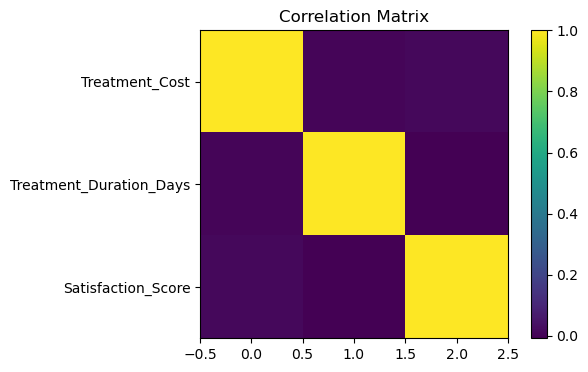

In [34]:
plt.figure(figsize=(6,4))
plt.imshow(corr_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Matrix")
plt.show()


### 7. Extract patients who had poor outcomes despite high costs.

In [20]:
avg_cost = df['Treatment_Cost'].mean()
AvgCost_PoorOut = df[(df['Treatment_Cost'] > avg_cost) & (df['Outcome'] == 'Critical')]
AvgCost_PoorOut

,Record_ID,Patient_ID,Doctor_ID,Treatment_Date,Outcome,Treatment_Duration_Days,Treatment_Cost,Satisfaction_Score,Name_x,Specialty,Years_Of_Experience,Hospital_Affiliation,Name_y,Gender,Age,Region,Disease,Age_Group
4,T100004,P4724,D1165,2023-05-06,Critical,18,6652.05,4.7,Dr_165,Endocrinologist,4,Hospital_5,Patient_3724,Other,28,South,Diabetes,Adult
6,T100006,P2475,D1003,2023-03-13,Critical,18,6571.37,4.9,Dr_3,Neurologist,6,Hospital_3,Patient_1475,Female,81,South,Hypertension,Senior
13,T100013,P3583,D1180,2023-01-17,Critical,13,7004.69,5.6,Dr_180,Endocrinologist,25,Hospital_0,Patient_2583,Female,61,East,Asthma,Senior
67,T100067,P2927,D1134,2023-02-10,Critical,15,5593.48,5.8,Dr_134,Cardiologist,14,Hospital_14,Patient_1927,Male,88,North,Diabetes,Senior
69,T100069,P3007,D1226,2023-02-21,Critical,8,6005.02,4.8,Dr_226,Cardiologist,18,Hospital_6,Patient_2007,Female,55,North,COVID-19,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9859,T109859,P1454,D1220,2023-09-10,Critical,29,6212.74,5.4,Dr_220,Endocrinologist,22,Hospital_0,Patient_454,Male,76,West,Cardiac Issue,Senior
9882,T109882,P1739,D1089,2023-04-25,Critical,9,6752.53,4.8,Dr_89,General Physician,19,Hospital_9,Patient_739,Female,88,West,Diabetes,Senior
9900,T109900,P1766,D1257,2023-02-26,Critical,28,6921.40,5.4,Dr_257,General Physician,5,Hospital_17,Patient_766,Other,28,East,Cardiac Issue,Adult
9901,T109901,P4214,D1188,2023-02-24,Critical,14,6007.74,5.6,Dr_188,General Physician,16,Hospital_8,Patient_3214,Female,59,East,Cardiac Issue,Adult


In [21]:
#Count of highcost & poor outcome
len(AvgCost_PoorOut)

504

### 8. Save cleaned and merged data to CSV for dashboard use. 

In [22]:
df.to_csv(r"Downloads/Cleaned_TreatmentRecords_Merged.csv")

### 9. Show monthly trend of admissions using a line plot.

In [23]:
df['Month'] = df['Treatment_Date'].dt.strftime('%b')
Monthly_Admissions = df.groupby('Month')['Record_ID'].count()


months_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
Monthly_Admissions = Monthly_Admissions.reindex(months_order)
Monthly_Admissions

Month
Jan    809
Feb    784
Mar    865
Apr    749
May    825
Jun    817
Jul    842
Aug    866
Sep    805
Oct    873
Nov    838
Dec    927
Name: Record_ID, dtype: int64

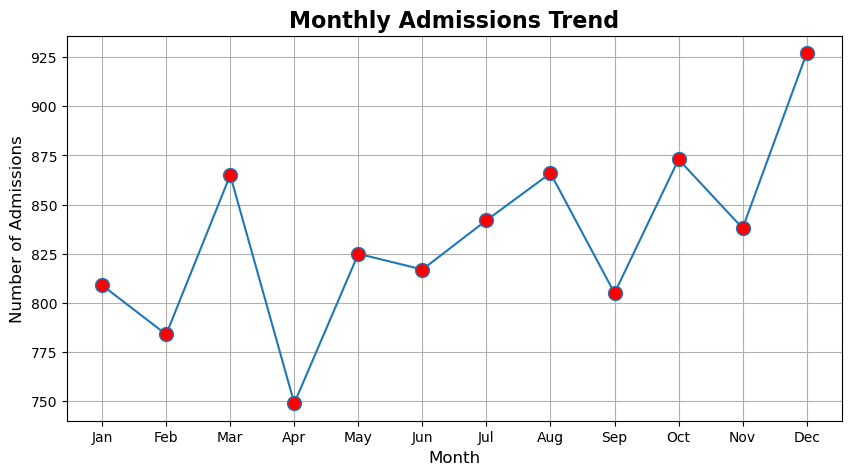

In [37]:
plt.figure(figsize=(10,5))
plt.plot(Monthly_Admissions.index.astype(str), Monthly_Admissions.values, marker='o', ms= 10, mfc= 'red')

plt.title("Monthly Admissions Trend", fontsize=16, weight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Admissions", fontsize=12)
plt.grid()

plt.show()

### 10. Group data to find doctors with best outcome-to-cost ratio.

In [25]:
outcome_map = {'Recovered': 3, 'Ongoing': 2, 'Critical': 1}
df['Outcome_Score'] = df['Outcome'].map(outcome_map)

best_doctors = df.groupby('Doctor_ID').apply(
    lambda x: x['Outcome_Score'].mean() / x['Treatment_Cost'].mean()
).reset_index(name='Outcome_to_Cost')

# Sort descending to get top doctors
best_doctors = best_doctors.sort_values('Outcome_to_Cost', ascending=False)
best_doctors.head(10)


C:\Users\soura\AppData\Local\Temp\ipykernel_21940\1483335430.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_doctors = df.groupby('Doctor_ID').apply(


,Doctor_ID,Outcome_to_Cost
249,D1249,0.000629
197,D1197,0.000618
294,D1294,0.000603
46,D1046,0.000598
43,D1043,0.000597
161,D1161,0.000596
57,D1057,0.000594
261,D1261,0.000592
158,D1158,0.000591
19,D1019,0.000589


In [26]:
import os
os.getcwd()

'C:\\Users\\soura'

In [43]:
outcome_map = {'Recovered': 3, 'Ongoing': 2, 'Critical': 1}

df['Outcome_Score'] = df['Outcome'].map(outcome_map)

df['Outcome_per_Cost'] = df['Outcome_Score'] / df['Treatment_Cost']

best_doctors = (
    df.groupby('Doctor_ID')['Outcome_per_Cost']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)


best_doctors.to_frame(name= 'Outcome_per_Cost')

,Outcome_per_Cost
Doctor_ID,
D1275,0.001278
D1161,0.001073
D1292,0.001030
D1014,0.001026
D1175,0.001022
D1294,0.000965
D1004,0.000954
D1222,0.000949
D1230,0.000935
